<a href="https://colab.research.google.com/github/ankitrao260100-blip/exploratory_data_analysis_eda_on_a_public_dataset.ipynb/blob/main/Hexsoftwares_exploratory_data_analysis_eda_on_a_public_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for better visualization
sns.set(style="whitegrid")


In [ ]:
# df = pd.read_csv("")
df = pd.read_csv("/content/titanic .csv")


In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Fill Age with mean
df['age'].fillna(df['age'].mean(), inplace=True)

# Fill embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop deck column (too many missing values)
df.drop('deck', axis=1, inplace=True)

df.isnull().sum()

/tmp/ipython-input-1552797438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-1552797438.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 111


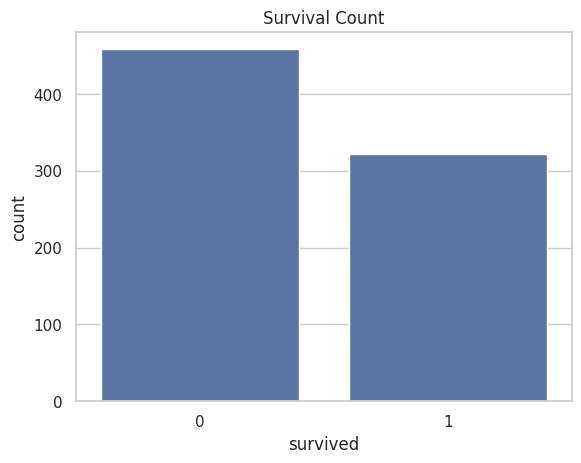

In [ ]:
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()

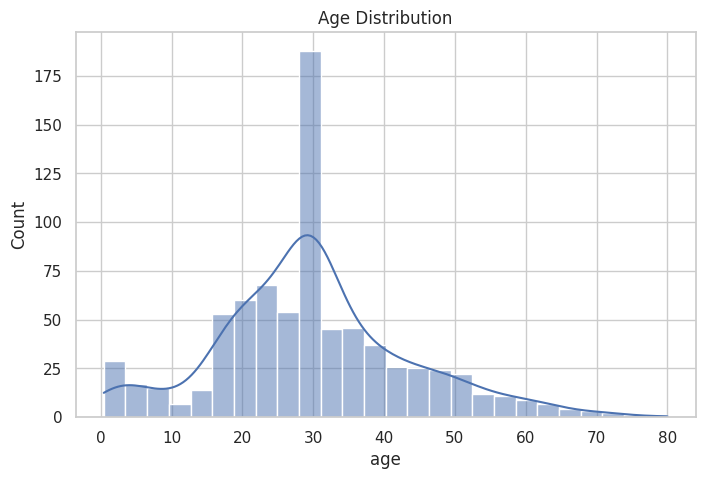

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

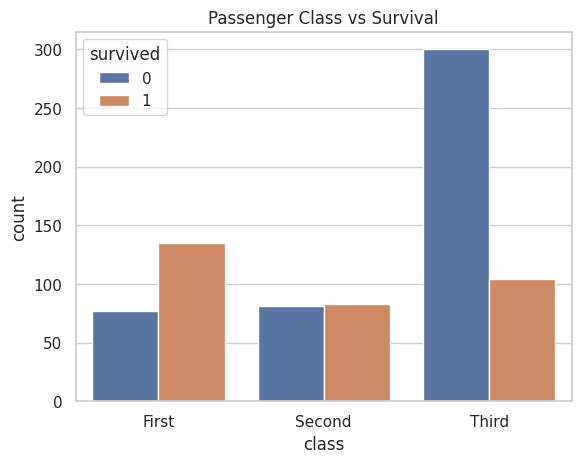

In [ ]:
sns.countplot(x='class', hue='survived', data=df)
plt.title("Passenger Class vs Survival")
plt.show()

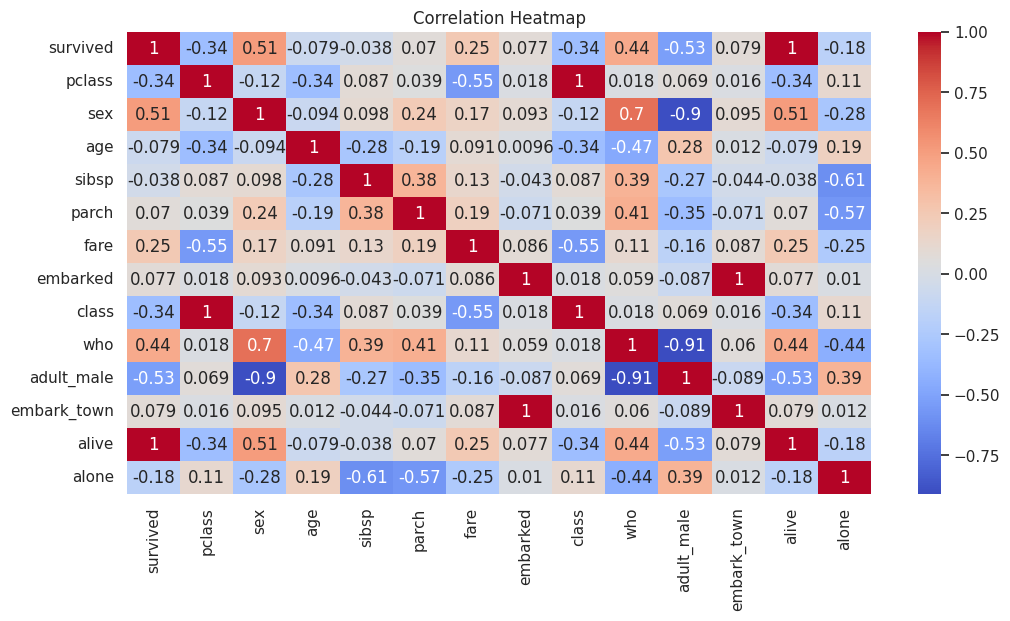

In [ ]:
# Encode categorical variables
df_corr = df.copy()

df_corr['sex'] = df_corr['sex'].map({'male':0, 'female':1})
df_corr['embarked'] = df_corr['embarked'].map({'S':0, 'C':1, 'Q':2})
df_corr['class'] = df_corr['class'].map({'First':1, 'Second':2, 'Third':3})
df_corr['alone'] = df_corr['alone'].astype(int)

# Encode remaining categorical columns for correlation calculation
df_corr['who'] = df_corr['who'].map({'man':0, 'woman':1, 'child':2})
df_corr['embark_town'] = df_corr['embark_town'].map({'Southampton':0, 'Cherbourg':1, 'Queenstown':2})
df_corr['alive'] = df_corr['alive'].map({'no':0, 'yes':1})

plt.figure(figsize=(12,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()